In [81]:
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.model_selection import train_test_split

from matplotlib import pyplot
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/DACON CUP'

train_df = pd.read_csv(path + '/open_data/train.csv', encoding = 'euc-kr')
train_df.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18


In [ ]:
# train_df.info()

- EDA - 시간별
  - train_h = train_df.copy()

In [ ]:
train_h = train_df.copy()

In [ ]:
# 시간별 사용자와 세션의 관계

print((train_h['사용자']-train_h['세션']).mean())  # --> 사용자와 세션은 거의 동일함. 오차가 없음.

train_h['UV_S_diff'] = abs(train_h['사용자']-train_h['세션'])
train_h['UV_S_diff'].unique()

0.35358796296296297


array([  0,   1,   3,   4,   2,   5,   6,   7,  13,   8,  10,   9,  12,
        16,  11,  28,  14,  21,  23,  31,  17,  34,  20,  15,  22,  30,
        19,  26,  25,  18,  24,  27,  33,  29,  37,  32,  39,  40,  55,
        77, 147,  38,  36])

In [ ]:
# 사용자와 페이지뷰의 관계

# 페이지뷰: 홈페이지에 들어온 접속자가 둘러 본 페이지수. 
# PV/UV : 한 사용자가 둘러본 페이지 수.

train_h['PV/UV'] = train_h['페이지뷰']/train_h['사용자']
train_h.head()


,DateTime,사용자,세션,신규방문자,페이지뷰,UV_S_diff,PV/UV
0,2018-09-09 00:00:00,19,19,8,206,0,10.842105
1,2018-09-09 01:00:00,20,19,9,259,1,12.950000
2,2018-09-09 02:00:00,12,9,1,48,3,4.000000
3,2018-09-09 03:00:00,10,10,2,102,0,10.200000
4,2018-09-09 04:00:00,6,5,3,18,1,3.000000


- EDA - date 기준

In [ ]:
# date 기준으로.

train_df['DateTime'] = pd.to_datetime(train_df.DateTime) #dtype: datetime으로 변경
train_df['date'] = train_df.DateTime.dt.date
train_df  = train_df.groupby('date').sum().reset_index()
train_df.head()

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,281,266,73,1826
1,2018-09-10,264,247,51,2092
2,2018-09-11,329,310,58,1998
3,2018-09-12,300,287,45,2595
4,2018-09-13,378,344,50,3845


In [ ]:
# 사용자와 세션의 관계
'''
print((train_df['사용자']-train_df['세션']).mean())  

train_df['UV_S_diff'] = abs(train_df['사용자']-train_df['세션'])
train_df['UV_S_diff'].unique()

'''

"\nprint((train_df['사용자']-train_df['세션']).mean())  \n\ntrain_df['UV_S_diff'] = abs(train_df['사용자']-train_df['세션'])\ntrain_df['UV_S_diff'].unique()\n\n"

In [ ]:
# 사용자와 페이지뷰의 관계

# 페이지뷰: 홈페이지에 들어온 접속자가 둘러 본 페이지수. 
# PV/UV : 한 사용자가 둘러본 페이지 수.



train_df['PV/UV'] = train_df['페이지뷰']/train_df['사용자']
train_df.head()


,date,사용자,세션,신규방문자,페이지뷰,PV/UV
0,2018-09-09,281,266,73,1826,6.498221
1,2018-09-10,264,247,51,2092,7.924242
2,2018-09-11,329,310,58,1998,6.072948
3,2018-09-12,300,287,45,2595,8.650000
4,2018-09-13,378,344,50,3845,10.171958


#### 날짜 feature 추가

In [ ]:
# date 기준 변수 만들기


def create_features(df):
    """
    Creates time series features from datetime index
    """
    # df['DateTime'] = df.index
    # df['hour'] = df['date'].dt.hour
    df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek #요일
    df['quarter'] = pd.to_datetime(df['date']).dt.quarter 
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['year'] = pd.to_datetime(df['date']).dt.year # 날짜의 해당 연도 시작에서부터의 일 수를 반환 
    df['dayofyear'] = pd.to_datetime(df['date']).dt.dayofyear
    df['dayofmonth'] = pd.to_datetime(df['date']).dt.day
    df['weekofyear'] = pd.to_datetime(df['date']).dt.weekofyear
    
    X = df[['사용자','세션','신규방문자','페이지뷰'
          ,  'PV/UV'
          ,'date','dayofweek','quarter','month','year' 
           ,'dayofyear','dayofmonth','weekofyear']]
    X.set_index('date', inplace = True)
    X.index = pd.to_datetime(X.index)
    return X

In [ ]:
train = create_features(train_df)
train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  app.launch_new_instance()


,사용자,세션,신규방문자,페이지뷰,PV/UV,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,,
2018-09-09,281,266,73,1826,6.498221,6,3,9,2018,252,9,36
2018-09-10,264,247,51,2092,7.924242,0,3,9,2018,253,10,37
2018-09-11,329,310,58,1998,6.072948,1,3,9,2018,254,11,37
2018-09-12,300,287,45,2595,8.650000,2,3,9,2018,255,12,37
2018-09-13,378,344,50,3845,10.171958,3,3,9,2018,256,13,37


##### 추가된 날짜 feature EDA 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_

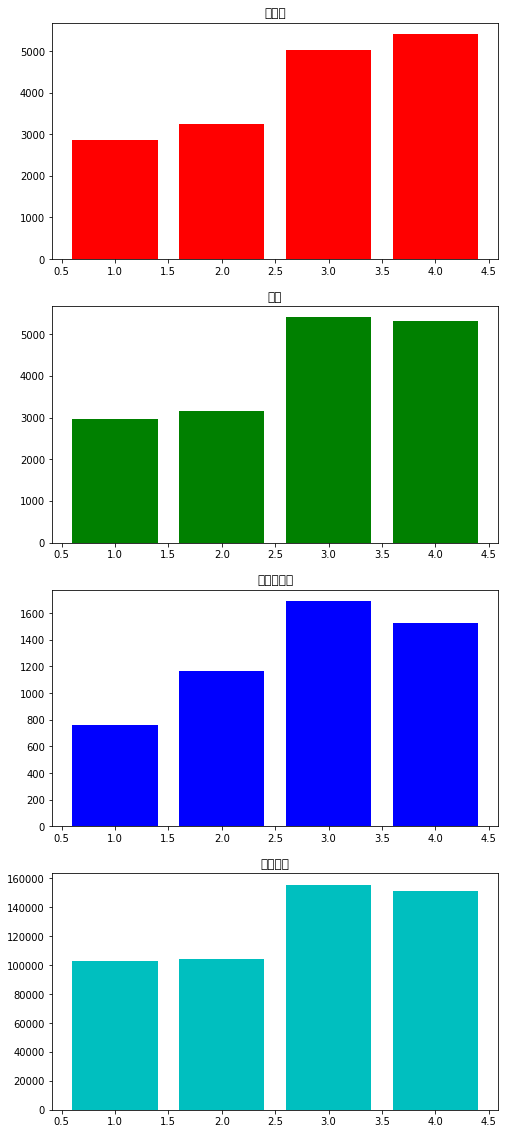

In [ ]:
# quarter간에 차이가 있는지 확인

fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(train['quarter'], train['사용자'], color='r')
axes[1].bar(train['quarter'], train['세션'], color='g')
axes[2].bar(train['quarter'], train['신규방문자'], color='b')
axes[3].bar(train['quarter'], train['페이지뷰'], color='c')
for i, title in enumerate(['사용자','세션','신규방문자','페이지뷰']):
    axes[i].set_title(title)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_

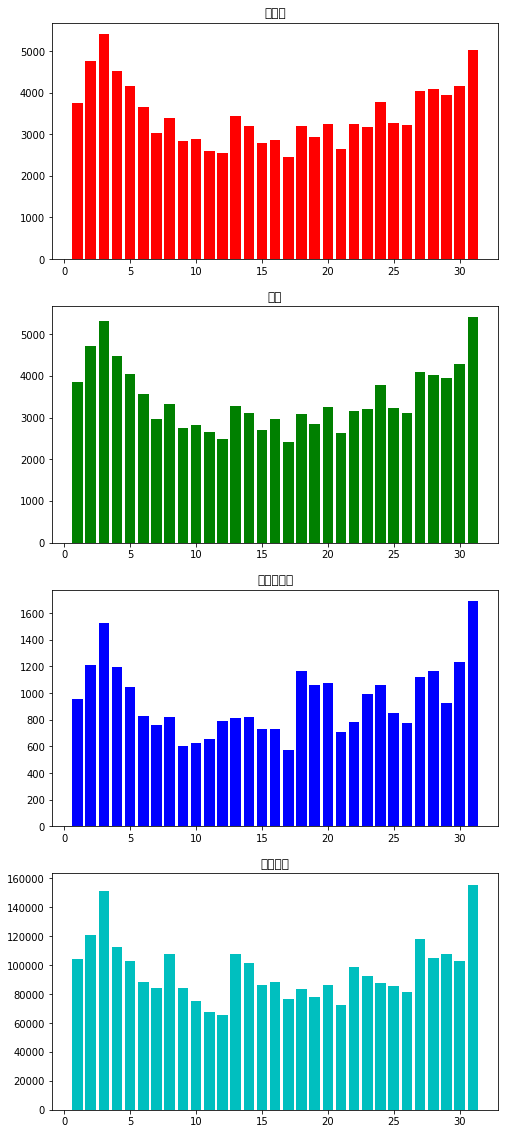

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(train['dayofmonth'], train['사용자'], color='r')
axes[1].bar(train['dayofmonth'], train['세션'], color='g')
axes[2].bar(train['dayofmonth'], train['신규방문자'], color='b')
axes[3].bar(train['dayofmonth'], train['페이지뷰'], color='c')
for i, title in enumerate(['사용자','세션','신규방문자','페이지뷰']):
    axes[i].set_title(title)
plt.show()

#### 범주형 인코딩

- one-hot 인코딩: 카테고리가 별로 없는거
- binary 인코딩: 카테고리가 많은 거

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
# bianry encoding

# dayofyear	dayofmonth	weekofyear

encoder = ce.BinaryEncoder(cols=['dayofyear'])
train = encoder.fit_transform(train)

encoder = ce.BinaryEncoder(cols=['dayofmonth'])
train = encoder.fit_transform(train)

encoder = ce.BinaryEncoder(cols=['weekofyear'])
train = encoder.fit_transform(train)

print(train.shape)
# train.head(3)

(792, 32)


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# one-hot encoding

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["dayofweek", "quarter", "month", "year"]
train = dummy_data(train,dummy_columns)

print(train.shape)
train.head(3)

(792, 54)


,사용자,세션,신규방문자,페이지뷰,PV/UV,dayofyear_0,dayofyear_1,dayofyear_2,dayofyear_3,dayofyear_4,dayofyear_5,dayofyear_6,dayofyear_7,dayofyear_8,dayofyear_9,dayofmonth_0,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,weekofyear_0,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2018,year_2019,year_2020
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-09,281,266,73,1826,6.498221,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-10,264,247,51,2092,7.924242,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-11,329,310,58,1998,6.072948,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


## 추가데이터 가공

In [7]:
'''
## 정해진 기간만 예측을 잘하면 될 뿐 추후 데이터가 안 주어진다고 하여도 알 수 있는 정보들 활용 ##
ex)

# Y별로 다르게


- 대회 카테고리 별(영향력 있는 대회) 뽑아서 test 기간내의 같은 카테고리 대회 기간 예측
   *시각화 대회나 분류 대회 등 중에서 대표적인 것(지배적인 대회)을 바탕으로 범주를 통합 


- 대회가 진행되는 개수에 따라 비슷한 개수로 열리는 대회 기간 예측
   *진행되는 개수가 2019년 2월 3월(train)과 2020년 12월 21~30일(test)가 같다면 해당 기간들을 예측

'''

'\n## 정해진 기간만 예측을 잘하면 될 뿐 추후 데이터가 안 주어진다고 하여도 알 수 있는 정보들 활용 ##\nex)\n\n# Y별로 다르게\n\n\n- 대회 카테고리 별(영향력 있는 대회) 뽑아서 test 기간내의 같은 카테고리 대회 기간 예측\n   *시각화 대회나 분류 대회 등 중에서 대표적인 것(지배적인 대회)을 바탕으로 범주를 통합 \n\n\n- 대회가 진행되는 개수에 따라 비슷한 개수로 열리는 대회 기간 예측\n   *진행되는 개수가 2019년 2월 3월(train)과 2020년 12월 21~30일(test)가 같다면 해당 기간들을 예측\n\n'

In [253]:

# user =  pd.read_csv(path + '/open_data/info_user.csv', encoding = 'euc-kr')
# login = pd.read_csv(path +'/open_data/info_login.csv', encoding = 'euc-kr')
competition = pd.read_csv(path +'/open_data/info_competition.csv', encoding = 'euc-kr', index_col=0)
# info_submission =  pd.read_csv(path +'/open_data/info_submission.csv', encoding = 'euc-kr')


##### info_competiton

In [254]:
competition.head(2)

,cpt_id,is_official,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show
0,136,1,2018-08-14 0:00,2018-09-13 23:59,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,303,5,5,850,"$8,500 + 100,000ZPR",2018-09-13 23:59,3
1,9565,1,2018-09-15 0:00,2018-10-13 23:59,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,448,10,3,350,"$3,500 + 40,000ZPR",2018-10-13 23:59,3


- date_cpt_count() 함수 생성
    - : 각 날짜별 진행되고 있는 대회 개수
      - 대회가 진행되는 개수에 따라 비슷한 개수로 열리는 대회 기간 예측을 위해 사용
      - 아래 과정

In [255]:
# competition

# 각 날짜별 진행되고 있는 대회 개수
# competition 데이터셋의 모든 기간을 포함.

def date_cpt_count(competition):
    from datetime import date, timedelta

    # datatype: datetime으로 변경
    competition['period_start'] =  pd.to_datetime(competition.period_start)
    competition['period_end'] =  pd.to_datetime(competition.period_end)
    # date로 변경
    competition['period_start'] = competition.period_start.dt.date
    competition['period_end'] = competition.period_end.dt.date

    # 모든 대회 기간을 포함하는 datelist 생성. 897개
    start = competition['period_start'].min()
    end = competition['period_end'].max()

    datelist = []
    for i in range((end-start).days +1):
      datelist.append(start+timedelta(days=i))

    # 각 날짜에 대회가 몇개 열렸는지 매칭.
    cpt_cnt = [0 for i in range(len(datelist))] 

    for i in range(len(competition)):
      s = competition.iloc[i]['period_start']
      e =  competition.iloc[i]['period_end']
      
      t = 0
      for d in datelist:
        if d >= s and d<=e:
          cpt_cnt[t]+=1
        t+=1

    date_cpt_cnt = pd.DataFrame({'date':datelist
                                ,'count': cpt_cnt})
    date_cpt_cnt.head()

    return date_cpt_cnt


In [256]:
competition = date_cpt_count(competition)
competition.head()

,date,count
0,2018-08-14,1
1,2018-08-15,1
2,2018-08-16,1
3,2018-08-17,1
4,2018-08-18,1


###### 위 함수 생성 과정

In [ ]:
# 대회정보 데이터
# 48개의 대회

#len(competition['cpt_id'].unique())
#48

# period_end, merge_deadline 가 크게 다르지 않으므로 period_end만 사용하기
# len(competition[competition['period_end']!=competition['merge_deadline']])
#29

In [56]:
# datatype: datetime으로 변경
competition['period_start'] =  pd.to_datetime(competition.period_start)
competition['period_end'] =  pd.to_datetime(competition.period_end)
competition['merge_deadline'] =  pd.to_datetime(competition.merge_deadline)

# date로 변경
competition['period_start'] = competition.period_start.dt.date
competition['period_end'] = competition.period_end.dt.date
competition['merge_deadline'] = competition.merge_deadline.dt.date
competition.head(2)

,cpt_id,is_official,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show
0,136,1,2018-08-14,2018-09-13,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,303,5,5,850,"$8,500 + 100,000ZPR",2018-09-13,3
1,9565,1,2018-09-15,2018-10-13,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,448,10,3,350,"$3,500 + 40,000ZPR",2018-10-13,3


In [224]:
start = competition['period_start'].min()
end = competition['period_end'].max()

print(start, ' ~ ', end)

2018-08-14  ~  2021-01-26


In [225]:
from datetime import date, timedelta

datelist = []

for i in range((end-start).days +1):
  datelist.append(start+timedelta(days=i))

datelist[:5]

[datetime.date(2018, 8, 14),
 datetime.date(2018, 8, 15),
 datetime.date(2018, 8, 16),
 datetime.date(2018, 8, 17),
 datetime.date(2018, 8, 18)]

In [227]:
# 각 날짜에 대회가 몇개 열렸는지 매칭.

cpt_cnt = [0 for i in range(len(datelist))] 

for i in range(len(competition)):
  s = competition.iloc[i]['period_start']
  e =  competition.iloc[i]['period_end']
  
  t = 0
  for d in datelist:
    if d >= s and d<=e:
      cpt_cnt[t]+=1
    t+=1

date_cpt_cnt = pd.DataFrame({'date':datelist
                            ,'count': cpt_cnt})
date_cpt_cnt.head()

,date,count
0,2018-08-14,1
1,2018-08-15,1
2,2018-08-16,1
3,2018-08-17,1
4,2018-08-18,1


In [228]:
date_cpt_cnt.shape

(897, 2)

### train 전처리

In [ ]:
# scaling

mini = train.iloc[:,:5].min()
size = train.iloc[:,:5].max() - train.iloc[:,:5].min()
train.iloc[:,:5] = (train.iloc[:,:5] -  mini) / size
train.head()

,사용자,세션,신규방문자,페이지뷰,PV/UV,dayofyear_0,dayofyear_1,dayofyear_2,dayofyear_3,dayofyear_4,dayofyear_5,dayofyear_6,dayofyear_7,dayofyear_8,dayofyear_9,dayofmonth_0,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,weekofyear_0,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2018,year_2019,year_2020
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-09,0.051689,0.049083,0.042604,0.011735,0.093358,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-10,0.048551,0.045564,0.029586,0.013446,0.122954,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-11,0.060550,0.057233,0.033728,0.012842,0.084531,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-12,0.055197,0.052973,0.026036,0.016682,0.138017,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-13,0.069596,0.063530,0.028994,0.024724,0.169604,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
# scaling

input_window = 61
output_window = 61 # 7

window_x = np.zeros((train.shape[0] - (input_window + output_window), input_window, 54))
window_y = np.zeros((train.shape[0] - (input_window + output_window), output_window, 4))

for start in range(train.shape[0] - (input_window + output_window)):
    end = start + input_window    
    window_x[start,:, :] = train.iloc[start : end                , : ].values
    window_y[start,:, :] = train.iloc[end   : end + output_window, :4 ].values


print('window_x.shape: ', window_x.shape)
print('window_y.shape: ', window_y.shape)

window_x.shape:  (670, 61, 54)
window_y.shape:  (670, 61, 4)


In [ ]:
# window_x

### 모델링

- 시계열 데이터 임베딩 찾아서 적용해보기
- 스케일링 다르게 해보기
- dropout 적용해보기

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

from tensorflow.keras.layers import Dense, LSTM, Input, TimeDistributed, Dropout
from tensorflow.keras.models import Model


optimizer = Adam, loss = mse, activation_function = 따로지정x

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(61, 54), return_sequences=True))  # (timestep, features)
model.add(LSTM(32, return_sequences=True)) 
model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=True)) 
# model.add(LSTM(32, return_sequences=True)) 
#model.add(LSTM(32, return_sequences=True)) 
# model.add(LSTM(32, return_sequences=True)) 
model.add(TimeDistributed(Dense(4)))

model.summary()

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss = 'mean_squared_error' )  # loss=tf.keras.losses.MeanSquaredError() 

model.fit(window_x, window_y, epochs=100, batch_size=50)



Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 61, 32)            11136     
_________________________________________________________________
lstm_81 (LSTM)               (None, 61, 32)            8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 32)            0         
_________________________________________________________________
lstm_82 (LSTM)               (None, 61, 32)            8320      
_________________________________________________________________
time_distributed_29 (TimeDis (None, 61, 4)             132       
Total params: 27,908
Trainable params: 27,908
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
14/14 [==============================] - 6s 75ms/step - loss: 0.0475
Epoch 2/100
14/14 [===============

## test : last_df

In [ ]:
# train은 이미 위에서 minmax scaler적용되어있음.

last_df = train.iloc[-61:,:].values[np.newaxis,...] # np.newaxis: 3D로 차원을 늘려줌. 
last_df.shape

(1, 61, 54)

In [ ]:
pred_last = model.predict(last_df)
pred_last[:5]

array([[[0.6046039 , 0.61066055, 0.49490568, 0.5588843 ],
        [0.767046  , 0.7734009 , 0.6313772 , 0.72006106],
        [0.7236427 , 0.73155487, 0.5751779 , 0.6643739 ],
        [0.6641102 , 0.67467004, 0.53192174, 0.57202774],
        [0.70445776, 0.71485615, 0.606465  , 0.6294049 ],
        [0.53957283, 0.5420397 , 0.43475717, 0.45205396],
        [0.521287  , 0.5224417 , 0.41803476, 0.40313062],
        [0.762557  , 0.77231205, 0.6795602 , 0.629499  ],
        [0.75297964, 0.7576839 , 0.67168534, 0.6297535 ],
        [0.66779387, 0.6694174 , 0.5764854 , 0.53290915],
        [0.64455837, 0.641731  , 0.5552491 , 0.51217455],
        [0.62130374, 0.6136826 , 0.52911806, 0.50189984],
        [0.5059888 , 0.49363363, 0.392377  , 0.39104706],
        [0.518793  , 0.50811625, 0.39360896, 0.3799806 ],
        [0.7632497 , 0.76626927, 0.6598749 , 0.6305615 ],
        [0.6324513 , 0.6281407 , 0.5052076 , 0.5042576 ],
        [0.68371   , 0.6794914 , 0.54196346, 0.5858864 ],
        [0.615

In [ ]:
pred_last = pred_last.reshape(output_window,4)
pred_last = pred_last * size[:4].values + mini[:4].values
pred_last = pred_last.astype(int)
pred_last


array([[  3276,   3297,    837,  86871],
       [  4156,   4176,   1068, 111923],
       [  3920,   3950,    973, 103267],
       [  3598,   3643,    899,  88913],
       [  3817,   3860,   1025,  97832],
       [  2923,   2927,    735,  70266],
       [  2824,   2821,    707,  62661],
       [  4131,   4170,   1149,  97846],
       [  4079,   4091,   1136,  97886],
       [  3618,   3615,    975,  82833],
       [  3492,   3465,    939,  79610],
       [  3366,   3314,    895,  78013],
       [  2741,   2666,    664,  60783],
       [  2811,   2744,    666,  59063],
       [  4135,   4138,   1116,  98012],
       [  3426,   3392,    854,  78380],
       [  3704,   3669,    916,  91068],
       [  3334,   3278,    790,  81932],
       [  3701,   3667,    984,  96297],
       [  2698,   2639,    618,  68217],
       [  2934,   2861,    623,  72677],
       [  4376,   4396,   1148, 121108],
       [  3892,   3858,    933, 105544],
       [  2621,   2537,    462,  61960],
       [  3407, 

In [ ]:
pred_last.shape

(61, 4)

## submit

In [ ]:
submission =  pd.read_csv(path + '/open_data/submission.csv', encoding = 'euc-kr')
submission.shape

(61, 5)

In [ ]:
pred_last.shape

(61, 4)

In [ ]:
pred_df = pd.DataFrame(pred_last)
pred_df.head()

,0,1,2,3
0,3276,3297,837,86871
1,4156,4176,1068,111923
2,3920,3950,973,103267
3,3598,3643,899,88913
4,3817,3860,1025,97832


In [ ]:
# 30까지 모두 채우면 다시 0부터.

for i in range(len(submission)):
  submission['사용자'][i] = pred_df[0][i]
  submission['세션'][i] = pred_df[1][i]
  submission['신규방문자'][i] = pred_df[2][i]
  submission['페이지뷰'][i] = pred_df[3][i]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Se

In [ ]:
submission.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3276,3297,837,86871
1,2020-11-10,4156,4176,1068,111923
2,2020-11-11,3920,3950,973,103267
3,2020-11-12,3598,3643,899,88913
4,2020-11-13,3817,3860,1025,97832


In [ ]:
submission.to_csv('feature 추가1.csv', index = False, encoding = 'euc-kr')

#### 결과 제일 좋았던, 나빴던 파일이랑 predict를 비교

In [ ]:
path2 = "/content/drive/MyDrive/Colab Notebooks/DACONCUP 주희"

In [ ]:
best = pd.read_csv(path2 + '/submit/add 날짜feature.csv', encoding = 'euc-kr')
best.set_index('DateTime', inplace = True)
best.index = pd.to_datetime(best.index)
best.head()

,사용자,세션,신규방문자,페이지뷰
DateTime,,,,
2020-11-09,3890,3868,1007,105121
2020-11-10,4455,4400,1193,127747
2020-11-11,3349,3331,799,84892
2020-11-12,3593,3610,953,86143
2020-11-13,2934,2882,689,72484


In [ ]:
worst = pd.read_csv('feature 추가2.csv', encoding = 'euc-kr')
# worst = pd.read_csv(path2 + '/submit/lstm5 e150 b10.csv', encoding = 'euc-kr')
worst.set_index('DateTime', inplace = True)
worst.index = pd.to_datetime(best.index)
#worst.head()

In [ ]:
submission.set_index('DateTime', inplace = True)
submission.index = pd.to_datetime(submission.index)
# submission.head()

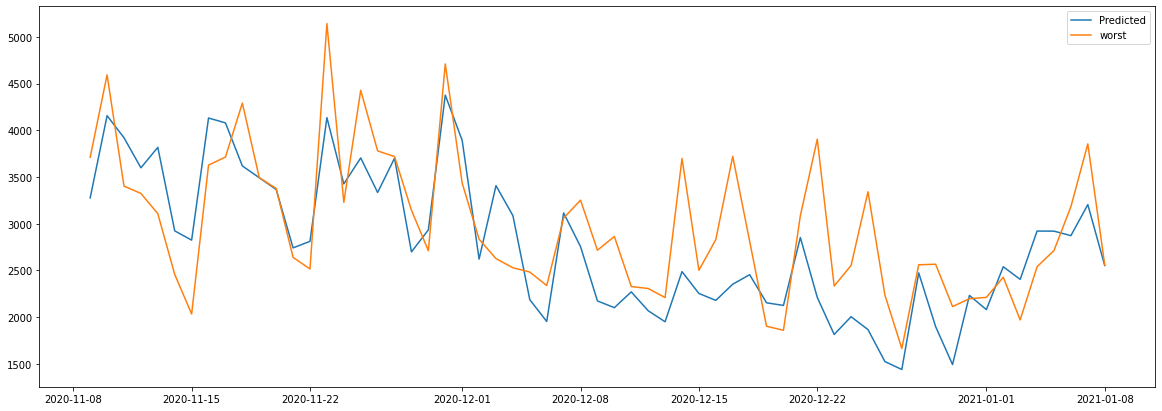

In [ ]:
# plot expected vs preducted


plt.figure(figsize = (20,7))
# pyplot.plot(best['사용자'], label='best')
pyplot.plot(submission['사용자'], label='Predicted')
pyplot.plot(worst['사용자'], label = 'worst')
pyplot.legend()
pyplot.show()

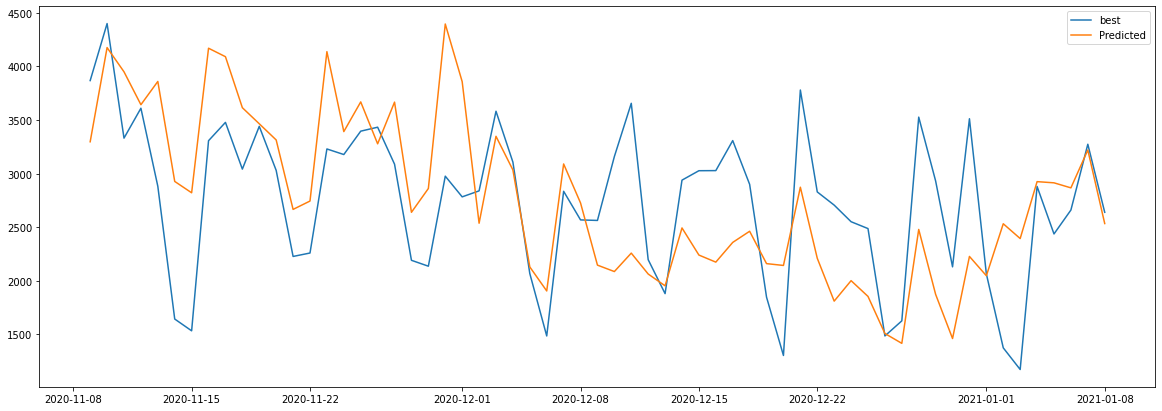

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(best['세션'], label='best')
pyplot.plot(submission['세션'], label='Predicted')
# pyplot.plot(worst['세션'], label = 'worst')
pyplot.legend()
pyplot.show()

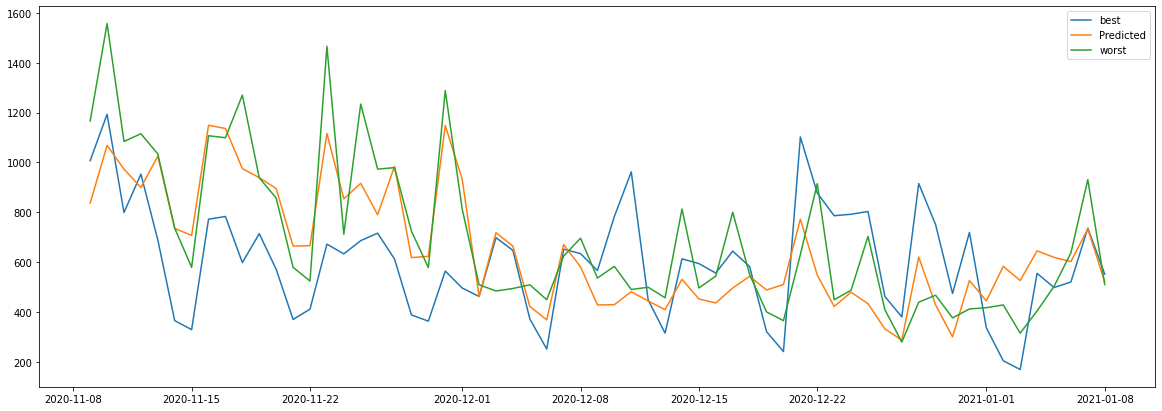

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(best['신규방문자'], label='best')
pyplot.plot(submission['신규방문자'], label='Predicted')
pyplot.plot(worst['신규방문자'], label = 'worst')
pyplot.legend()
pyplot.show()

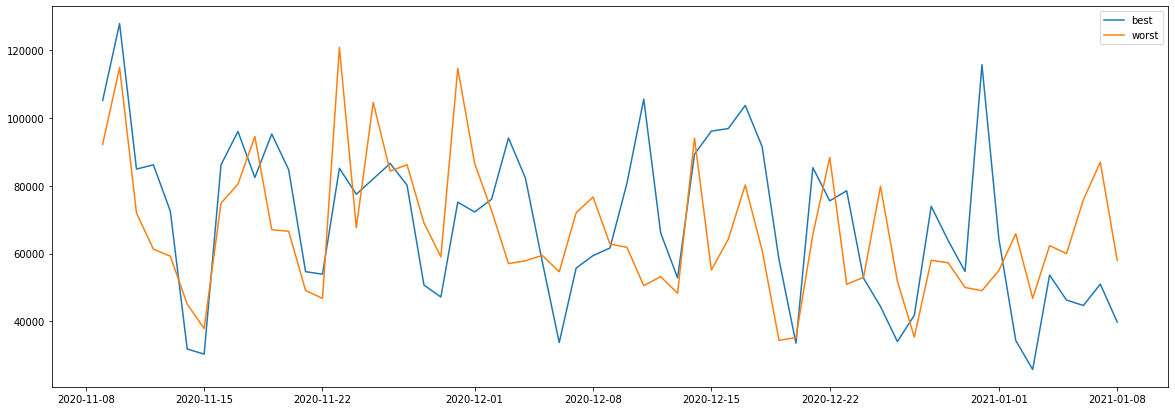

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(best['페이지뷰'], label='best')
#pyplot.plot(submission['페이지뷰'], label='Predicted')
pyplot.plot(worst['페이지뷰'], label = 'worst')
pyplot.legend()
pyplot.show()

- 위에 잘 예측하지 못하는 부분들은 조금 튀는 값인 것 같음
- 해당 일자에 어떤 특징(개최된 대회 등)을 파악
- 이후 1) 제거 또는 2) 특징 적용  (추세파악과 관련없다면 제거하기)

## 참조

In [ ]:
# 각 변수의 크기가 다르기 때문에 가중치를 부여한 RMSE로 모델의 성능을 평가

def dacon_rmse(true, pred):
    # true.shape // (N,4)
    # pred.shape // (N,4)
    # w0, w1, w2, w3 <= train.csv의 사용자 수, 세션 수, 신규 방문자 수, 페이지 뷰 수 4가지 항목별 평균값
    score = np.sqrt(np.mean(np.square(true[:,0] - pred[:,0]))) / w0 +\
            + np.sqrt(np.mean(np.square(true[:,1] - pred[:,1]))) / w1 +\
            + np.sqrt(np.mean(np.square(true[:,2] - pred[:,2]))) / w2 +\
            + np.sqrt(np.mean(np.square(true[:,3] - pred[:,3]))) / w3 +\
     return score

SyntaxError: ignored

In [ ]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

In [ ]:
# date 기준 변수 만들기

from datetime import datetime

def create_features(df):
    """
    Creates time series features from datetime index
    """
    # df['DateTime'] = df.index
    # df['hour'] = df['date'].dt.hour
    df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek
    df['quarter'] = pd.to_datetime(df['date']).dt.quarter
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['year'] = pd.to_datetime(df['date']).dt.year
    df['dayofyear'] = pd.to_datetime(df['date']).dt.dayofyear
    df['dayofmonth'] = pd.to_datetime(df['date']).dt.day
    df['weekofyear'] = pd.to_datetime(df['date']).dt.weekofyear
    
    X = df[['사용자','세션','신규방문자','페이지뷰','date','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    X.set_index('date', inplace = True)
    X.index = pd.to_datetime(X.index)
    return X

## 예측값을 x로 다시 predict  
- 마이너스 값이 나와서 실패..

In [ ]:
tr_month1 = pd.DataFrame(pred_month)

In [ ]:
# 위 예측값을 x로 사용하기.
mini1 = tr_month1.iloc[:,1:].min()
size1 = tr_month1.iloc[:,1:].max() - tr_month1.iloc[:,1:].min()
tr_month1.iloc[:,1:] = (tr_month1.iloc[:,1:] -  mini1) / size1

tr_month1 = tr_month1.iloc[:,:].values[np.newaxis,...] # np.newaxis: 3D로 차원을 늘려줌. 
tr_month1.shape

In [ ]:
pred_month1 = model.predict(tr_month1)
pred_month1[:5]

In [ ]:
pred_month1 = pred_month1.reshape(output_window,4)
pred_month1 = pred_month1 * size.values + mini.values
pred_month1 = pred_month1.astype(int)
pred_month1


#### 윈도우 크기 다르게 해서 train하고 test해보기

aa

## test = train[-61]

In [ ]:
test = train[-61:]
test

In [ ]:
# scaling

input_window = 30
output_window = 30

test_x = np.zeros((test.shape[0] - (input_window + output_window), input_window, 4))
test_y = np.zeros((test.shape[0] - (input_window + output_window), output_window, 4))

for start in range(test.shape[0] - (input_window + output_window)):
    end = start + input_window    
    test_x[start,:, :] = test.iloc[start : end                , 1: ].values
    test_y[start,:, :] = test.iloc[end   : end + output_window, 1: ].values


print('test_x.shape: ', test_x.shape)
print('test_y.shape: ', test_y.shape)

In [ ]:
pred = model.predict(test_x)
pred[:5]

In [ ]:
pred = pred.reshape(output_window,4)
pred = pred * size.values + mini.values
pred = pred.astype(int)
pred

In [ ]:
pred.shape

In [ ]:
baseline = pd.read_csv(path + '/open_data/baseline.csv', encoding = 'euc-kr' )
baseline.head()

In [ ]:
last_month = train.iloc[-30:,1:].values[np.newaxis,...].astype(float) #float() # <- 수정 후
last_month

In [ ]:

#last_month = torch.tensor(window_x[-1,:,:][np.newaxis,...]).float().to(device) <- 수정 전
last_month = train.iloc[-30:,1:].values[np.newaxis,...] # <- 수정 후
# last_month = torch.tensor(last_month).float() # <- 수정 후

for start in range((len(submission) - output_window)//7 + 2):
    start = start * 7
    next_week = model.predict(last_month)
    #last_month = torch.cat([last_month[-7:], next_week], axis = 1) <- 수정 전
    last_month = torch.cat([last_month[:,7:,:], next_week], axis = 1)# <- 수정 후

    pred_week = next_week.reshape(output_window,4)
    pred_week = pred_week * size.values + mini.values
    pred_week = pred_week.astype(int)
    
    if start/7 == (len(submission) - output_window)//7 + 1:
        submission.iloc[start :, 1:] = pred_week[-submission.iloc[start :, 1:].shape[0]:,:]
    else:
        submission.iloc[start : start + output_window, 1:] = pred_week
submission